In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch

In [2]:
dataset_df = pd.read_csv('/content/dataset.csv')

In [3]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


In [4]:
dataset_df.describe()

,f3,target
count,766.000000,766.000000
mean,69.118799,0.349869
std,19.376901,0.477240
min,0.000000,0.000000
25%,62.500000,0.000000
50%,72.000000,0.000000
75%,80.000000,1.000000
max,122.000000,1.000000


In [5]:
missing_values = dataset_df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [6]:
for column in dataset_df.columns:
    value_counts = dataset_df[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")


Value counts for f1:
f1
1     134
0     111
2     102
3      75
4      68
5      56
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
c       1
Name: count, dtype: int64

Value counts for f2:
f2
99     17
100    17
125    14
129    14
111    14
       ..
177     1
44      1
170     1
62      1
f       1
Name: count, Length: 137, dtype: int64

Value counts for f3:
f3
70     56
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     20
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

Value counts for f4:
f4
0     226
32     31
30     27
27     23
23     22


In [7]:
for column in dataset_df.columns:
    for column in dataset_df.columns:
      dataset_df[column] = dataset_df[column].astype(str)
      dataset_df[column] = dataset_df[column].replace(r'^[^0-9]+$', np.nan, regex=True)
      dataset_df[column] = pd.to_numeric(dataset_df[column], errors='coerce')
      mean_value = dataset_df[column].mean()
      dataset_df[column] = dataset_df[column].fillna(mean_value)

In [8]:
dataset_df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,3.849673,120.909804,69.118799,20.542484,80.091503,31.998170,0.472128,0.349869
std,3.371490,31.927057,19.376901,15.950080,115.298950,7.893111,0.331328,0.477240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.300000,0.244000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374500,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.750000,36.600000,0.625500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


In [9]:
for column in dataset_df.columns:
    value_counts = dataset_df[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for f1:
f1
1.000000     134
0.000000     111
2.000000     102
3.000000      75
4.000000      68
5.000000      56
6.000000      50
7.000000      45
8.000000      38
9.000000      28
10.000000     24
11.000000     11
13.000000     10
12.000000      9
14.000000      2
15.000000      1
17.000000      1
3.849673       1
Name: count, dtype: int64

Value counts for f2:
f2
99.000000     17
100.000000    17
125.000000    14
129.000000    14
111.000000    14
              ..
177.000000     1
44.000000      1
170.000000     1
62.000000      1
120.909804     1
Name: count, Length: 137, dtype: int64

Value counts for f3:
f3
70     56
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     20
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     

In [10]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      766 non-null    float64
 1   f2      766 non-null    float64
 2   f3      766 non-null    int64  
 3   f4      766 non-null    float64
 4   f5      766 non-null    float64
 5   f6      766 non-null    float64
 6   f7      766 non-null    float64
 7   target  766 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.0 KB


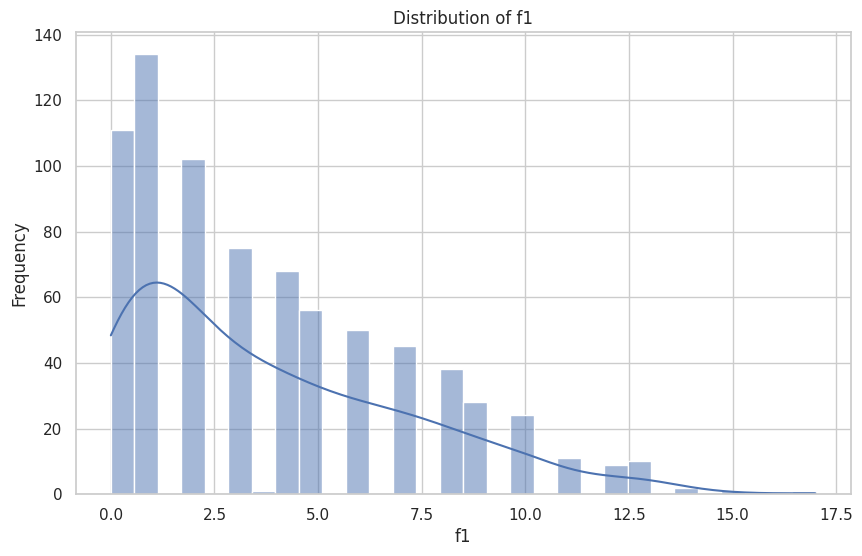

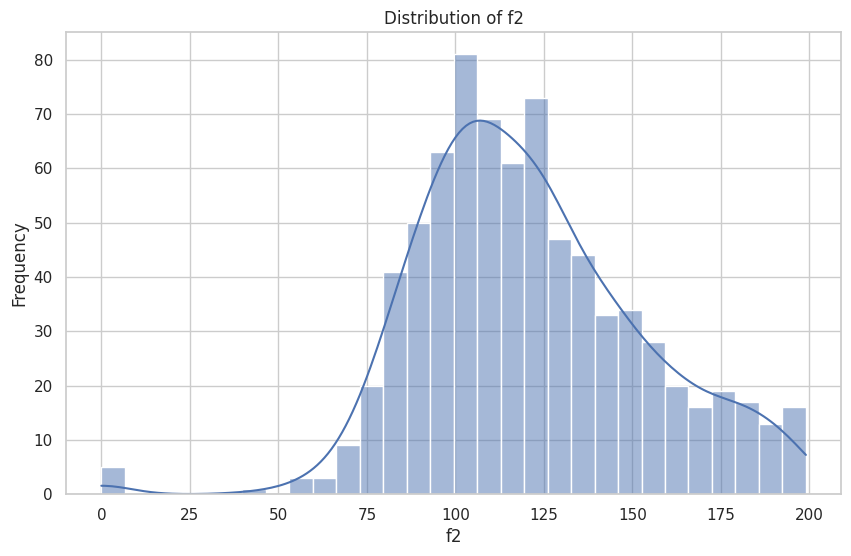

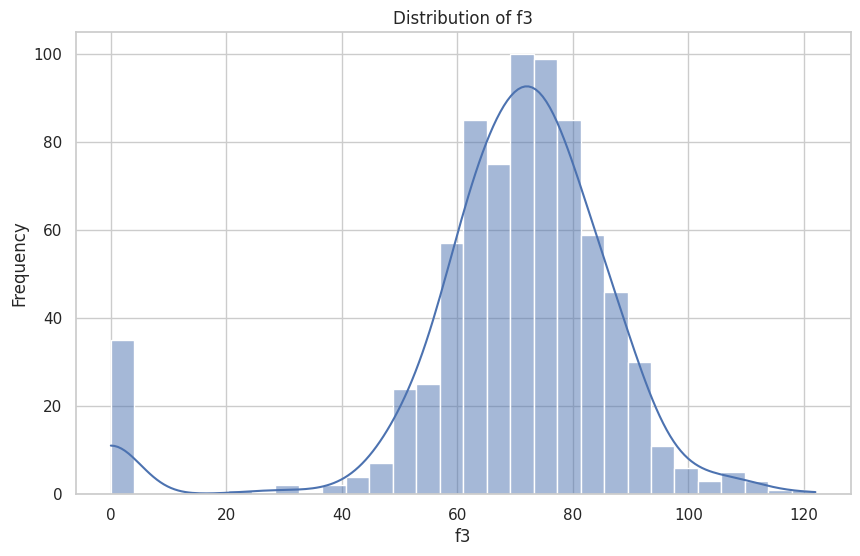

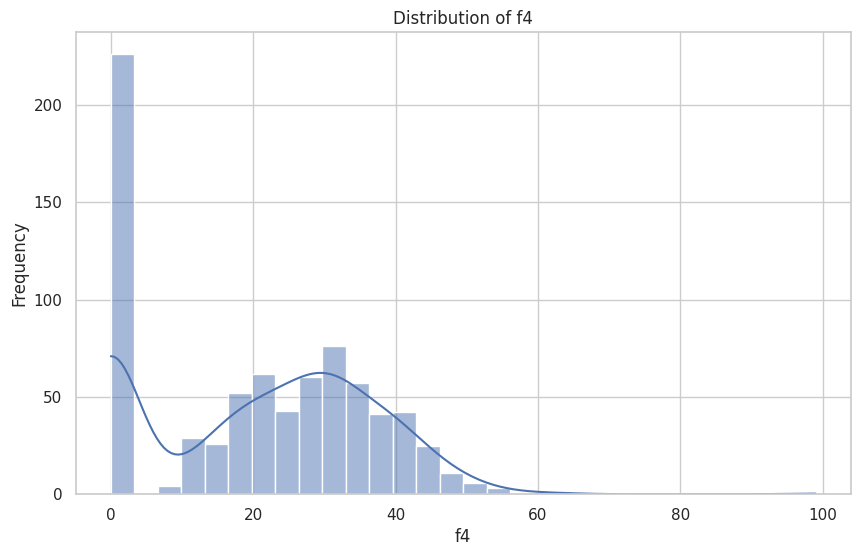

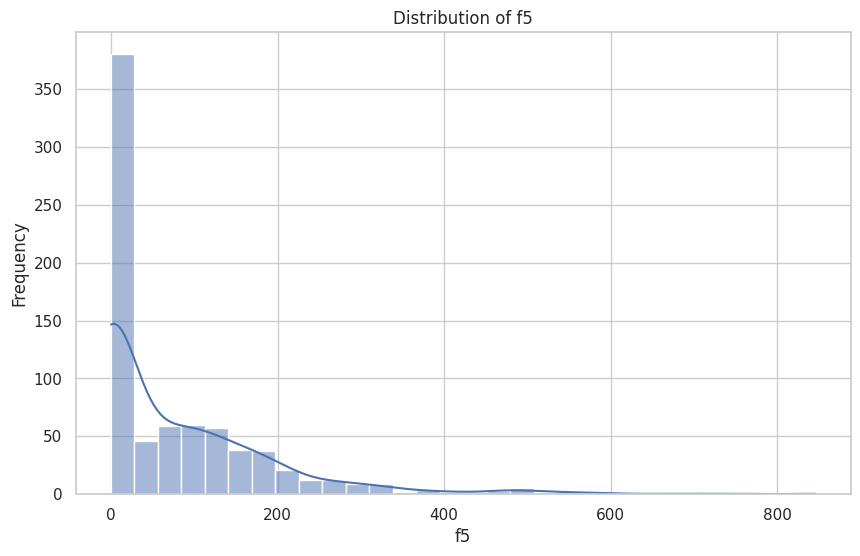

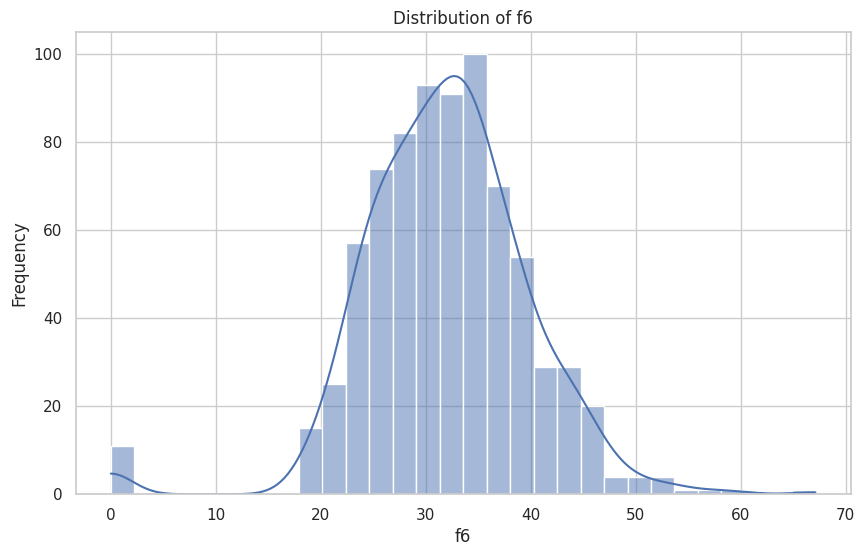

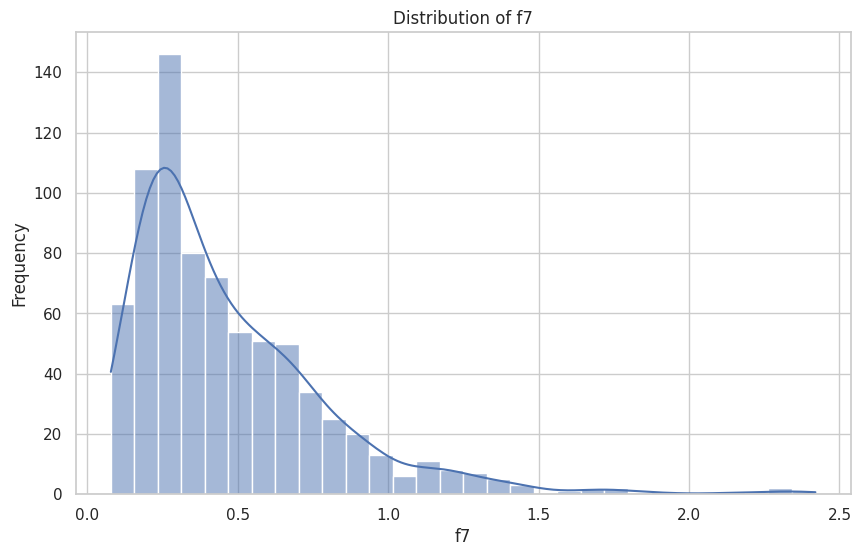

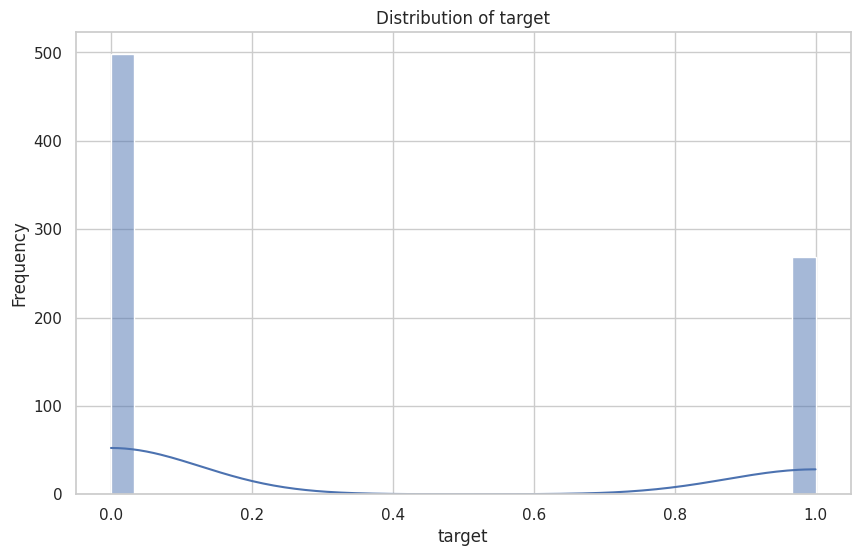

In [11]:
sns.set(style='whitegrid')
for column in dataset_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset_df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

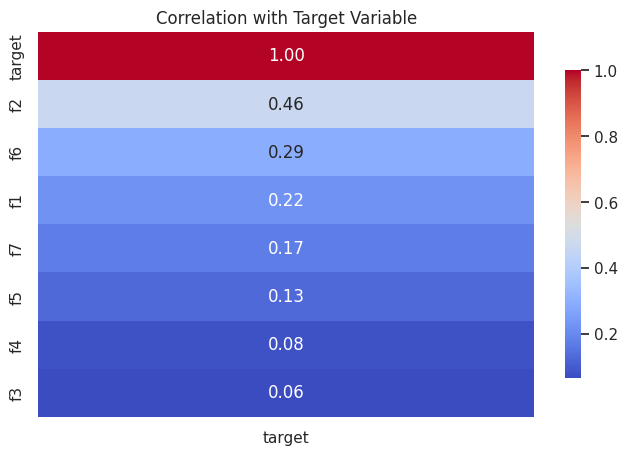

In [12]:
correlation_matrix = dataset_df.corr()
target_correlation = correlation_matrix[['target']].sort_values(by='target', ascending=False)
plt.figure(figsize=(8, 5))
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"shrink": .8})
plt.title('Correlation with Target Variable')
plt.show()

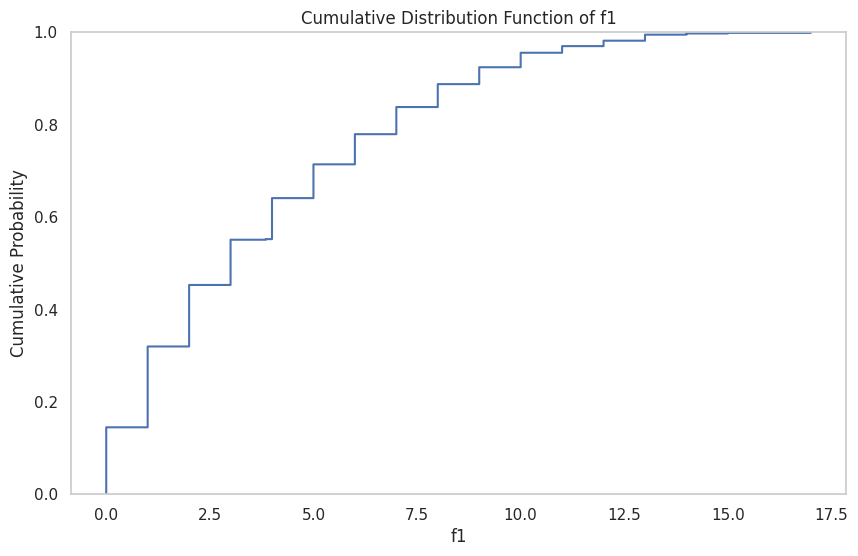

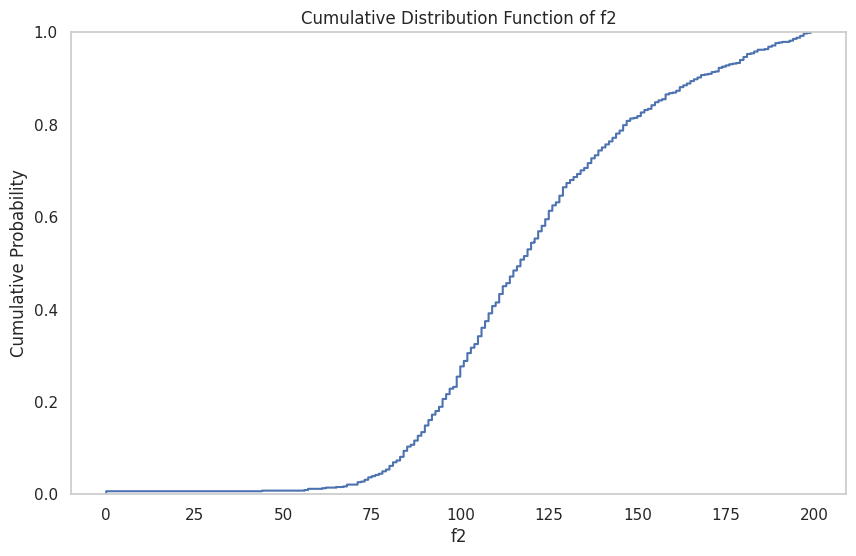

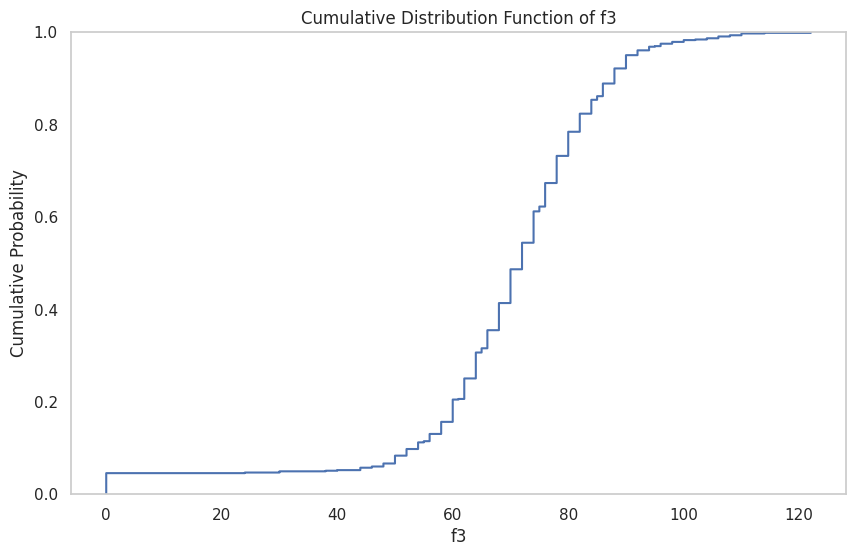

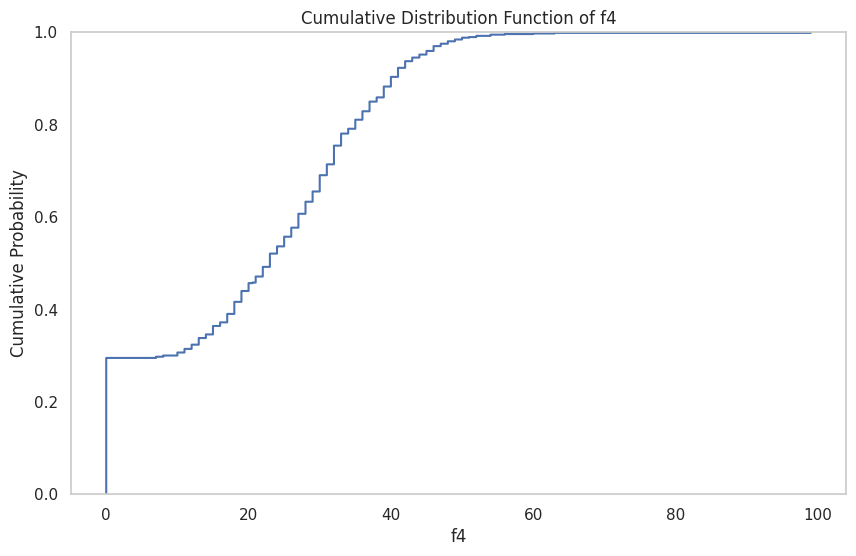

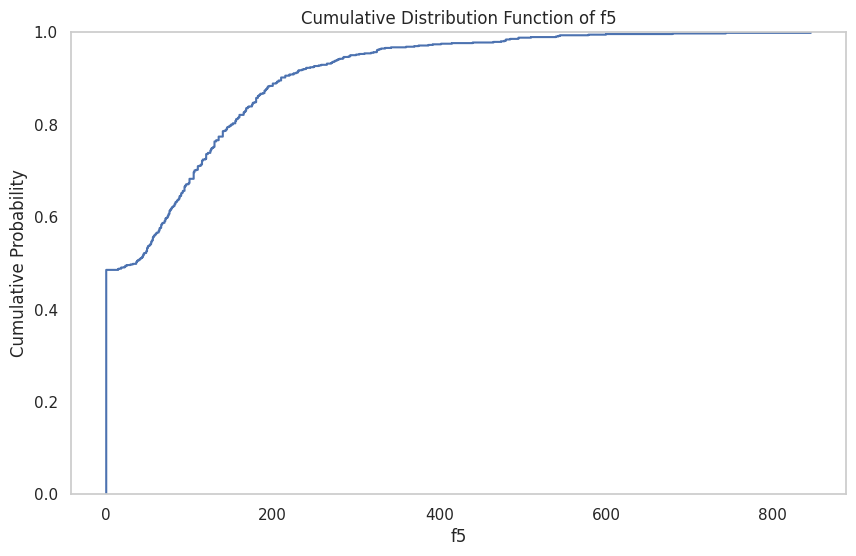

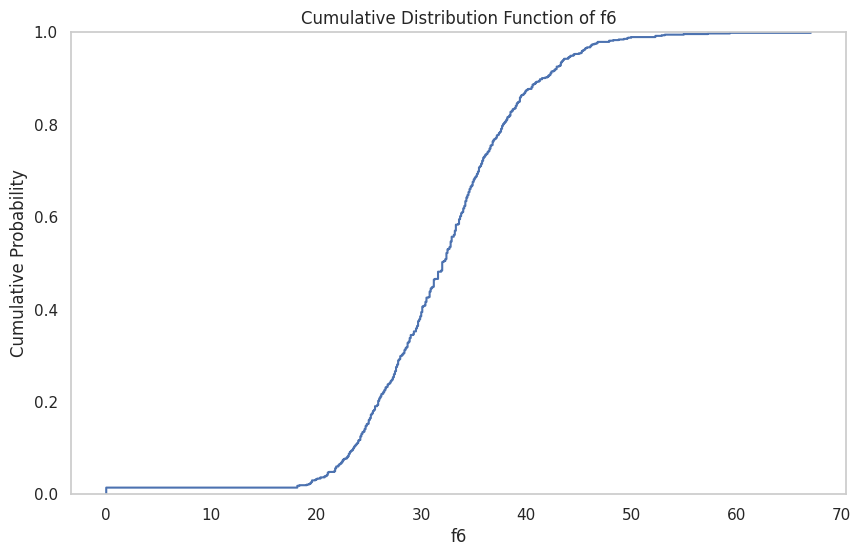

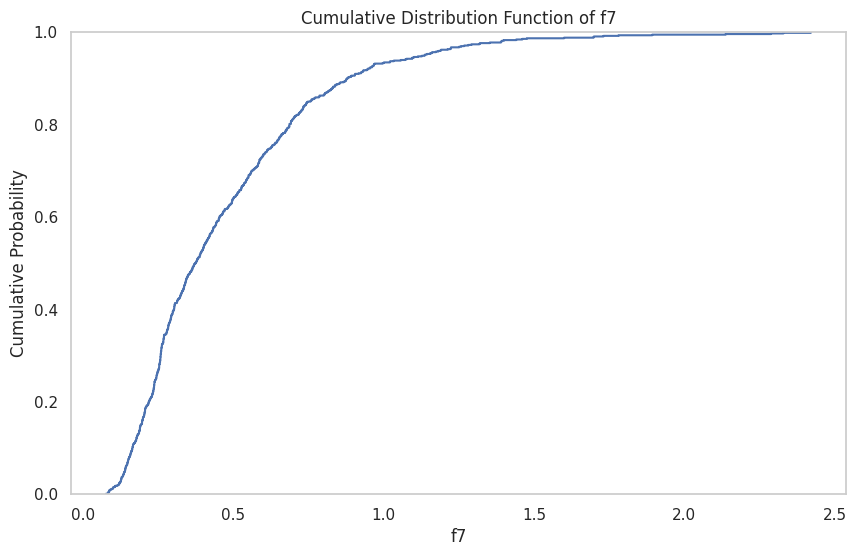

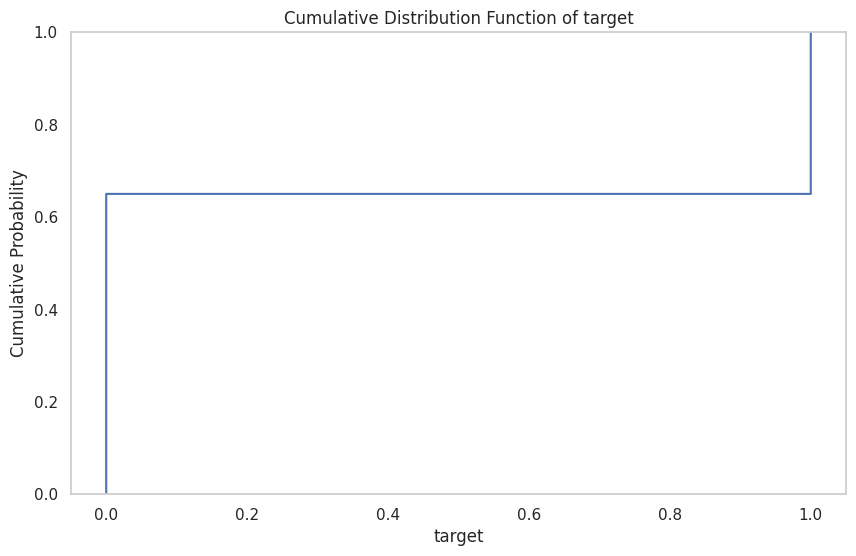

In [13]:
for column in dataset_df.columns:
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=dataset_df, x=column)
    plt.title(f'Cumulative Distribution Function of {column}')
    plt.xlabel(column)
    plt.ylabel('Cumulative Probability')
    plt.grid()
    plt.show()

In [14]:
X = dataset_df.drop(columns='target')
y = dataset_df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaled_dataset_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_dataset_df.head()

,f1,f2,f3,f4,f5,f6,f7
0,0.638214,0.849057,0.148790,0.907015,-0.695096,0.203073,0.467733
1,-0.845779,-1.125480,-0.161060,0.530596,-0.695096,-0.684356,-0.365823
2,1.231811,1.946022,-0.264343,-1.288765,-0.695096,-1.102715,0.603639
3,-0.845779,-1.000113,-0.161060,0.154176,0.120709,-0.494193,-0.921527
4,-1.142577,0.504297,-1.503740,0.907015,0.762938,1.407440,5.484172


In [15]:
X_scaled_df_pd = pd.DataFrame(X_scaled)
y_df_pd = pd.DataFrame(y)
preprocessed_df = pd.concat([X_scaled_df_pd, y_df_pd], axis=1)
preprocessed_df.to_csv('preprocessed_data.csv', index=False)

In [16]:
X_test_validate, X_test, y_test_validate, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_train_validate, y_train, y_train_validate = train_test_split(X_test_validate, y_test_validate, test_size=0.125, random_state=42, stratify=y_test_validate)
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_train_validate.shape, y_train_validate.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (602, 7) (602,)
Validation set shape: (87, 7) (87,)
Test set shape: (77, 7) (77,)


In [17]:
X_test_validate_tensor = torch.tensor(X_test_validate, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_validate_tensor = torch.tensor(y_test_validate.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_train_validate_tensor = torch.tensor(X_train_validate, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_train_validate_tensor = torch.tensor(y_train_validate.values, dtype=torch.float32)
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_train_validate_tensor shape:", X_train_validate_tensor.shape)
print("y_train_validate_tensor shape:", y_train_validate_tensor.shape)
print("X_test_validate_tensor shape:", X_test_validate_tensor.shape)
print("y_test_validate_tensor shape:", y_test_validate_tensor.shape)
print("X_test_tensor shape:", X_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)

X_train_tensor shape: torch.Size([602, 7])
y_train_tensor shape: torch.Size([602])
X_train_validate_tensor shape: torch.Size([87, 7])
y_train_validate_tensor shape: torch.Size([87])
X_test_validate_tensor shape: torch.Size([689, 7])
y_test_validate_tensor shape: torch.Size([689])
X_test_tensor shape: torch.Size([77, 7])
y_test_tensor shape: torch.Size([77])


Step 3 and 4 below this

In [18]:
!pip install torchinfo

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNetwork().to(device)
summary(model, input_size=(32, 7))


Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [32, 1]                   --
├─Sequential: 1-1                        [32, 1]                   --
│    └─Linear: 2-1                       [32, 64]                  512
│    └─ReLU: 2-2                         [32, 64]                  --
│    └─Linear: 2-3                       [32, 64]                  4,160
│    └─ReLU: 2-4                         [32, 64]                  --
│    └─Linear: 2-5                       [32, 1]                   65
│    └─Sigmoid: 2-6                      [32, 1]                   --
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
Total mult-adds (M): 0.15
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 0.02
Estimated Total Size (MB): 0.05

In [20]:
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_train_validate_tensor = X_train_validate_tensor.to(device)
y_train_validate_tensor = y_train_validate_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [29]:
import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

learning_rate = 0.0001
epochs = 1000
batch_size = 10
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list=[]
val_loss_list=[]
train_accuracy_list=[]
val_accuracy_list=[]

start_time = time.time()
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    model.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list.append(val_accuracy)
    val_loss_list.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")
torch.save(model.state_dict(), 'part1_step4_model.pt')

Epoch 1/1000, Training Loss: 33.38062, Validation Loss: 4.63714
Epoch 2/1000, Training Loss: 33.37357, Validation Loss: 4.63578
Epoch 3/1000, Training Loss: 33.36652, Validation Loss: 4.63443
Epoch 4/1000, Training Loss: 33.35947, Validation Loss: 4.63308
Epoch 5/1000, Training Loss: 33.35243, Validation Loss: 4.63173
Epoch 6/1000, Training Loss: 33.34540, Validation Loss: 4.63038
Epoch 7/1000, Training Loss: 33.33837, Validation Loss: 4.62904
Epoch 8/1000, Training Loss: 33.33135, Validation Loss: 4.62769
Epoch 9/1000, Training Loss: 33.32433, Validation Loss: 4.62634
Epoch 10/1000, Training Loss: 33.31731, Validation Loss: 4.62499
Epoch 11/1000, Training Loss: 33.31030, Validation Loss: 4.62365
Epoch 12/1000, Training Loss: 33.30330, Validation Loss: 4.62231
Epoch 13/1000, Training Loss: 33.29631, Validation Loss: 4.62096
Epoch 14/1000, Training Loss: 33.28932, Validation Loss: 4.61962
Epoch 15/1000, Training Loss: 33.28234, Validation Loss: 4.61828
Epoch 16/1000, Training Loss: 33.2

In [32]:
model.eval()
test_loss=0
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = loss_function(test_outputs, y_test_tensor.view(-1, 1))

print(f"Test Loss: {test_loss.item():.5f}")


Test Loss: 0.49333


In [33]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model.eval()
test_predictions = model(X_test_tensor).view(-1)
test_predictions_rounded = torch.round(test_predictions)

test_predictions_rounded_numpy = test_predictions_rounded.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy = accuracy_score(y_test_numpy, test_predictions_rounded_numpy)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_numpy, test_predictions_rounded_numpy, average='binary')

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Accuracy: 0.7662, Precision: 0.6667, Recall: 0.6667, F1 Score: 0.6667


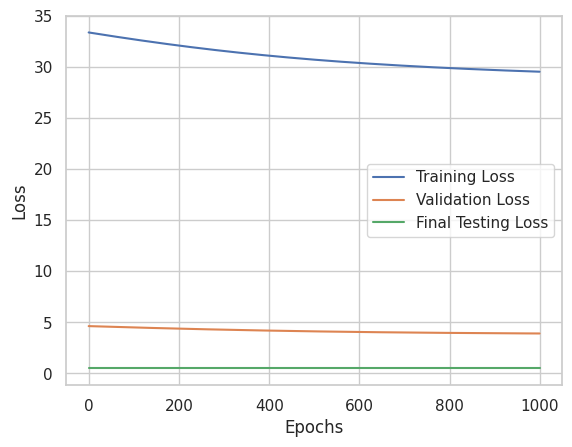

In [34]:
import matplotlib.pyplot as plt

epochs_range = range(epochs)

plt.plot(epochs_range, train_loss_list, label='Training Loss')
plt.plot(epochs_range, val_loss_list, label='Validation Loss')
plt.plot(epochs_range, [test_loss.cpu().item()]*epochs, label='Final Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

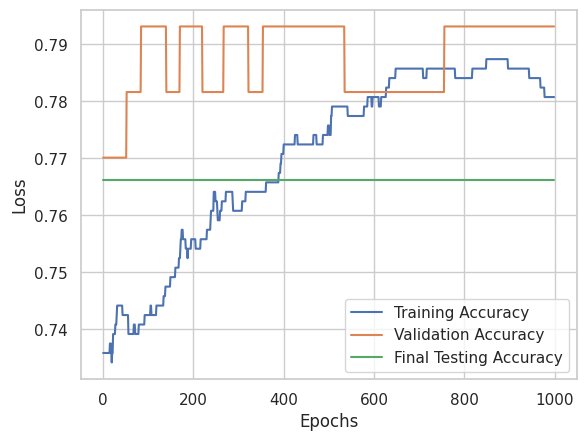

In [35]:
import matplotlib.pyplot as plt

epochs_range = range(epochs)

plt.plot(epochs_range, train_accuracy_list, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy_list, label='Validation Accuracy')
plt.plot(epochs_range, [accuracy]*epochs, label='Final Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

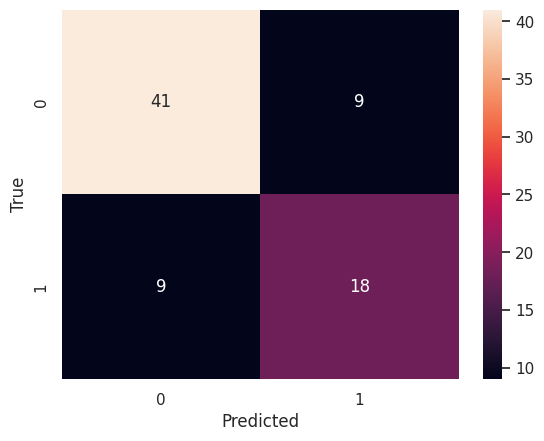

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_numpy, test_predictions_rounded_numpy)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [37]:
!pip install torchmetrics

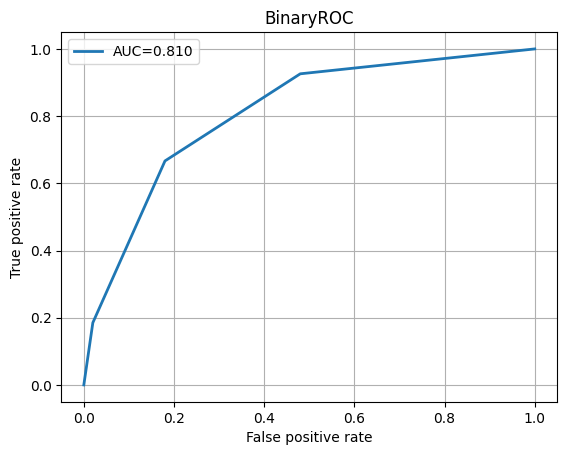

In [38]:
from torch import tensor
from torchmetrics.classification import BinaryROC

broc = BinaryROC(thresholds=5).to(device)
broc(test_predictions, y_test_tensor.to(torch.int))
broc.update(test_predictions, y_test_tensor.to(torch.int))
fig_, ax_ = broc.plot(score=True)